In [1]:
# Load the Pandas libraries with alias 'pd'
import glob
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import os
from scipy.stats import zscore
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings;

warnings.filterwarnings('ignore');

#laptop path
path = 'C:\\Users\\charl\\Dropbox\\Python\\Testbed'

#pc path
#path = 'C:\\Users\\Nick Rendell\\Dropbox\\Python\\Testbed'
allFiles = glob.glob(path + r"\*EEG*.csv")


# list all subject numbers in the EEG files

subjectnos = []
flatsubjects = []

for file_ in allFiles:
    subjectnos.append(re.findall(r'subject_(\d+)_session', file_))

# flatten results list

for sublist in subjectnos:
    for item in sublist:
        flatsubjects.append(item)

# change to integers
subject_list = [int(i) for i in flatsubjects]

# remove duplicates
subject_list = list(dict.fromkeys(subject_list))

# put in order?
subject_list.sort()

#loop through each subject/session/block EEG file and turn into dataframe

EEGlist = []
EEG = []

for i in subject_list:

  for s in range(1, 7):

    for b in range(1,6):
      
      #capture csv files

      submissions = glob.glob(path + '\subject_' + str(i) + '_session_' + str(s) + '_block_' + str(b) + '*SubmissionScores*.csv')
      EEG = glob.glob(path +'\subject_' + str(i) + '_session_' + str(s) + '_block_' + str(b) + '*EEG*.csv')

      #read into csv

      sub_df = pd.read_csv(submissions[0],index_col=None, header=0, usecols=[
        "Session Baseline Score (Alpha)",
        "Timestamp (s)", "Congruence", 
        "Reaction Time (ms)", "Accuracy", 
        "Time Between Events (s)", 
        "Alpha Value"], dtype={'Accuracy':str})
      EEG_df = pd.read_csv(EEG[0],index_col=None, header=0)

      # add columns with subject/session/block to dataframe

      EEG_df['subject'] = i
      EEG_df['session'] = s
      EEG_df['block'] = b

      #merge sub and EEG dataframes

      mergedEEG = pd.merge(EEG_df, sub_df,left_on = 'Sample Timestamp', right_on = 'Timestamp (s)',how='left')
                  
                 

      EEGlist.append(mergedEEG)

  
EEGframe = pd.concat(EEGlist, axis=0, ignore_index=True)

print(EEGframe.shape)

EEGframe= EEGframe.dropna(axis=0,subset=[
  'Total Stream Data (EEG-1)', 
  'Total Stream Data (EEG-2)',
  'Total Stream Data (EEG-3)',
  'Total Stream Data (EEG-4)',
  'Total Stream Data (Alpha Score)'])

#print(EEGframe)

# produce df with columns with z numbers of each of the eeg columns

z_scores = EEGframe.filter([
  'Reaction Time (ms)',
  'Total Stream Data (EEG-1)',
   'Total Stream Data (EEG-2)',
   'Total Stream Data (EEG-3)',
   'Total Stream Data (EEG-4)',
   'Total Stream Data (Alpha Score)'])

 # convert z_scores to z_scores 

z_scores = z_scores.apply(zscore)

# rename columns

z_scores.columns = ['Reaction Time (ms)-Z','Total Stream Data (EEG-1)-Z', 
  'Total Stream Data (EEG-2)-Z',
  'Total Stream Data (EEG-3)-Z',
  'Total Stream Data (EEG-4)-Z',
  'Total Stream Data (Alpha Score)-Z']

EEGframe = EEGframe.join(z_scores, how = 'left', sort=False)

EEGframe['Accuracy'].replace(['Correct','Incorrect'],[1,0],inplace=True)

#Produce histograms

#EEGhists = EEGframe.hist(column = ['Total Stream Data (EEG-1)',
#  'Total Stream Data (EEG-2)',
 # 'Total Stream Data (EEG-3)',
 # 'Total Stream Data (EEG-4)'])

#for ax in EEGhists.flatten():
 #   ax.set_xlim(400,1600)
  #  ax.set_ylim(0,len(EEGframe)/2) 

#Alpha_hist = EEGframe.hist(column = 'Total Stream Data (Alpha Score)')

#hist = EEGframe.hist(column ='Reaction Time (ms)',bins = 20)

#plt.show()

(10361812, 16)


Cross check that all of Eddies criteria have been fulfilled and produce histograms for each column of beta values

71323
the percentage left of results for participant 2 session 1 is 99.95235225696148
65009
the percentage left of results for control participant 32 session 1 is 90.31160135031882
71140
the percentage left of results for participant 2 session 2 is 99.65539461519064
64202
the percentage left of results for control participant 32 session 2 is 89.19545978688228
71299
the percentage left of results for participant 2 session 3 is 99.08281104517852
71167
the percentage left of results for control participant 32 session 3 is 98.86639901087757
71930
the percentage left of results for participant 2 session 4 is 99.94719875500222
65266
the percentage left of results for control participant 32 session 4 is 90.67366870892899
52933
the percentage left of results for participant 2 session 5 is 73.55381088028903
66196
the percentage left of results for control participant 32 session 5 is 91.9606018087604
70951
the percentage left of results for participant 2 session 6 is 98.61153578874217
66681
the 

65311
the percentage left of results for control participant 40 session 4 is 90.73618694341405
no incorrect answers, cannot analyse
68604
the percentage left of results for participant 10 session 5 is 95.29789273361207
66959
the percentage left of results for control participant 40 session 5 is 93.01540555933711
63338
the percentage left of results for participant 10 session 6 is 87.99266473097067
70147
the percentage left of results for control participant 40 session 6 is 97.43992221141825
54836
the percentage left of results for participant 11 session 1 is 76.19074084366142
64487
the percentage left of results for control participant 41 session 1 is 89.58891929814811
57899
the percentage left of results for participant 11 session 2 is 80.42644811779414
70794
the percentage left of results for control participant 41 session 2 is 98.35368649189347
65204
the percentage left of results for participant 11 session 3 is 90.5850154901988
66755
the percentage left of results for control parti

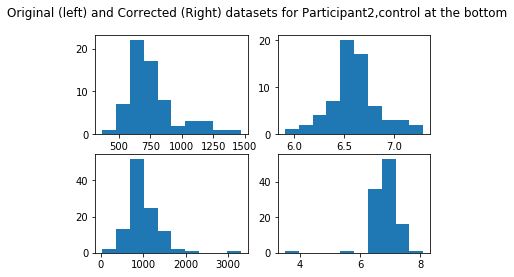

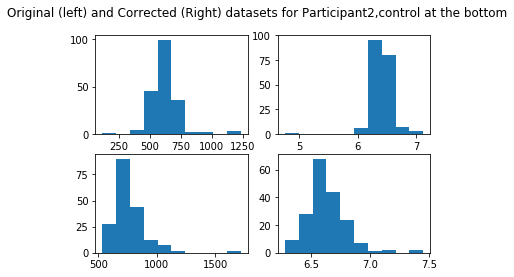

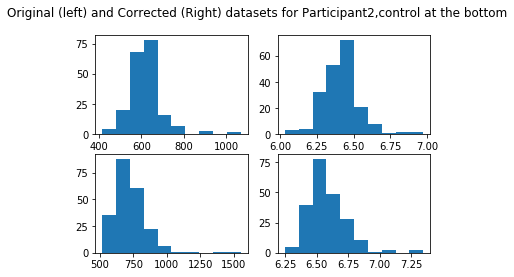

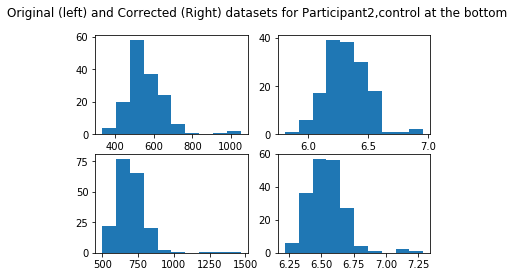

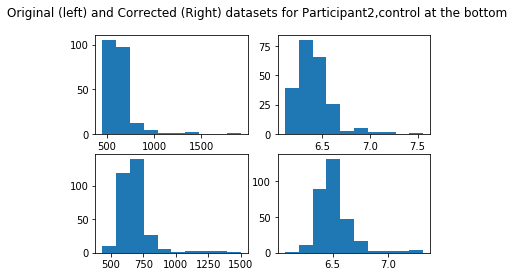

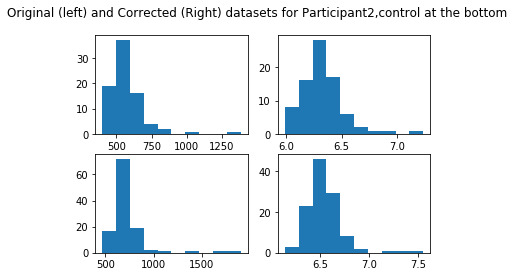

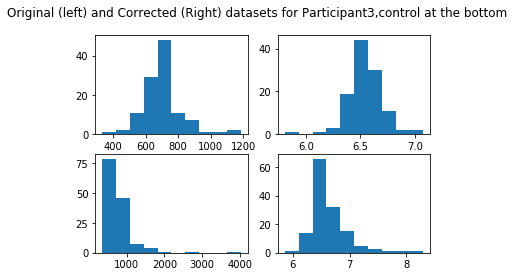

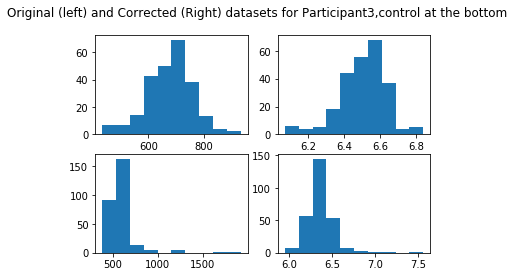

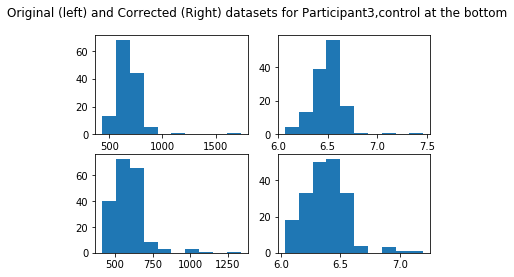

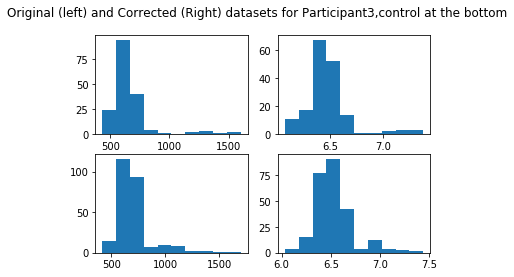

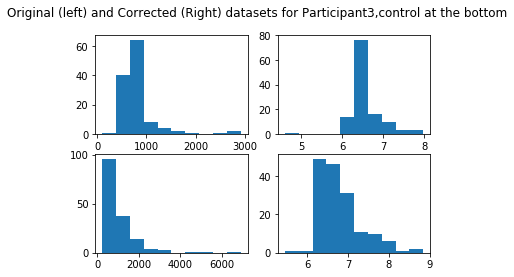

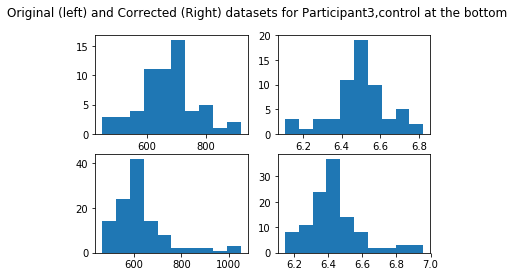

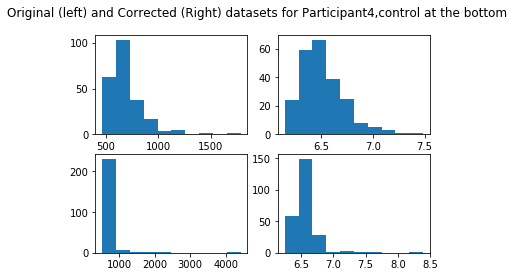

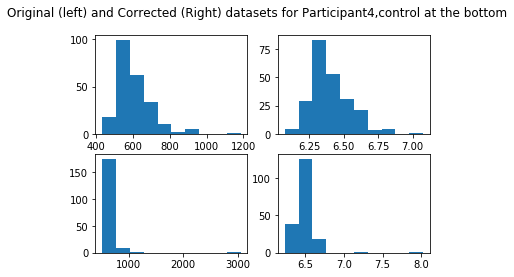

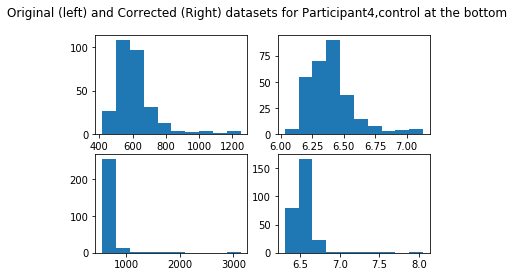

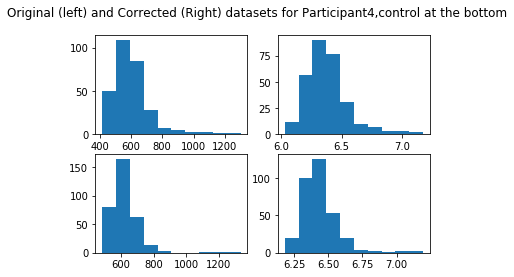

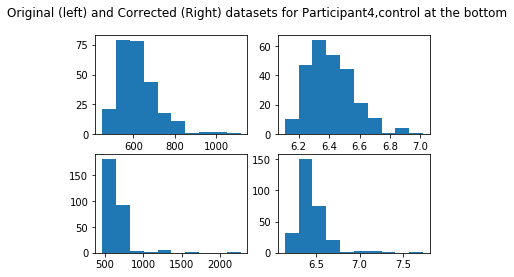

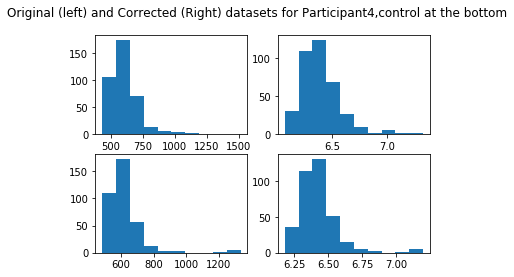

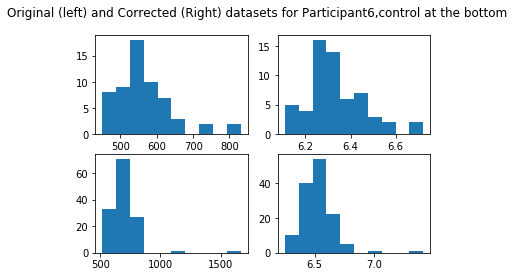

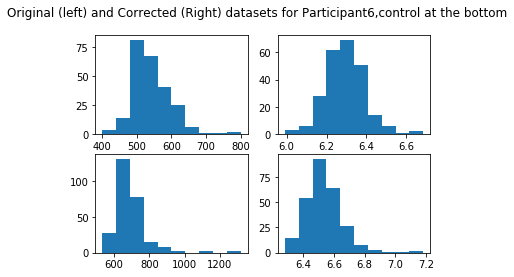

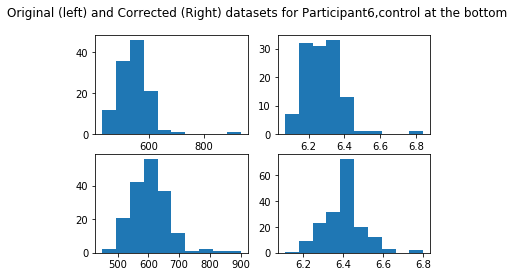

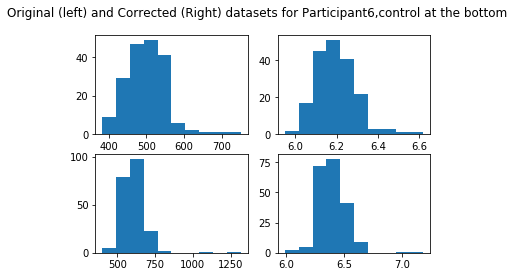

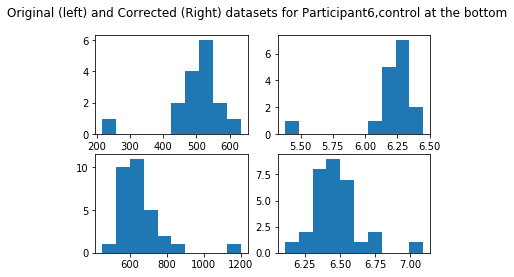

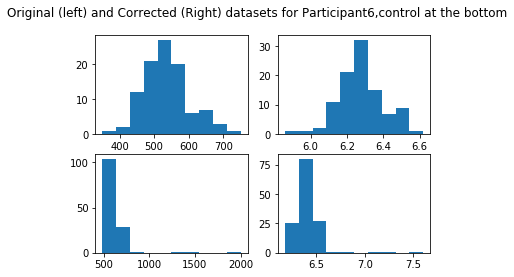

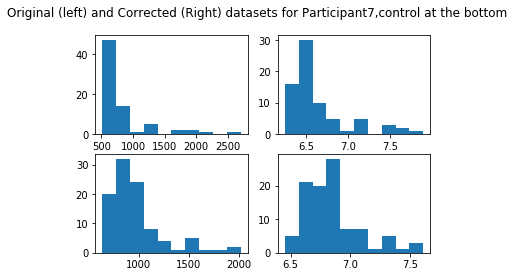

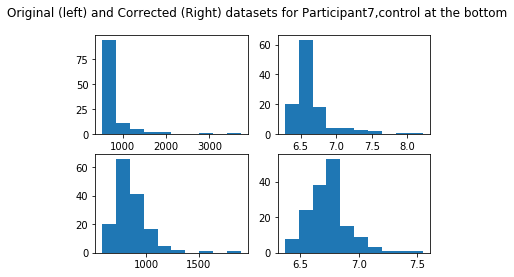

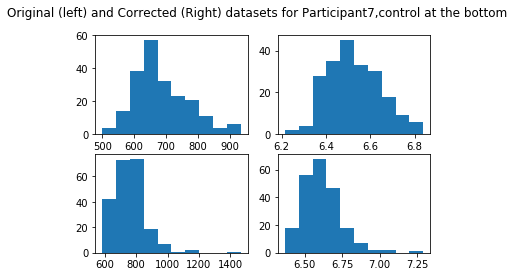

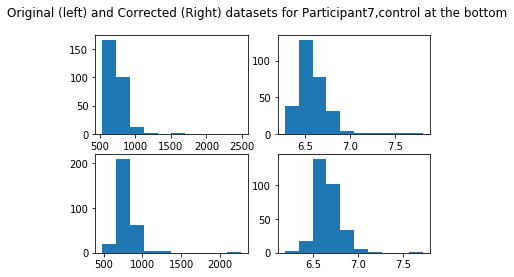

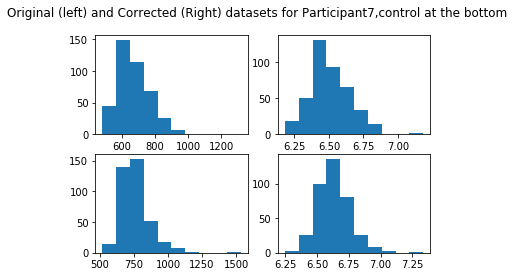

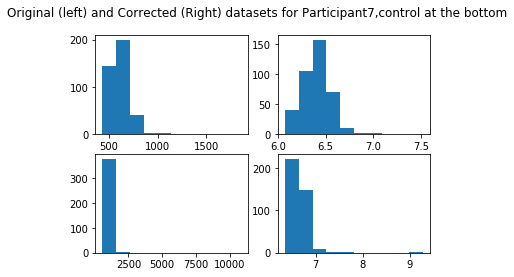

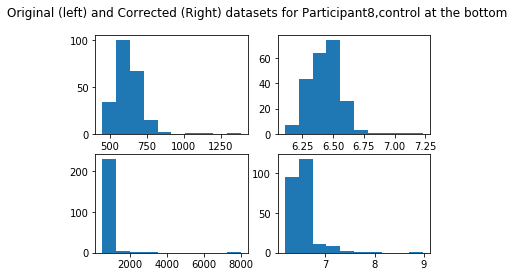

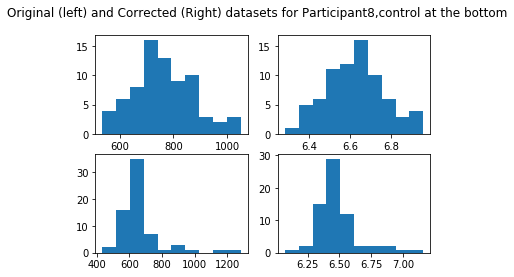

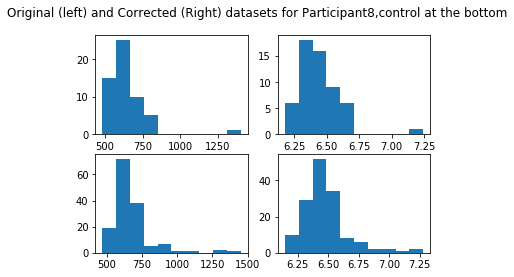

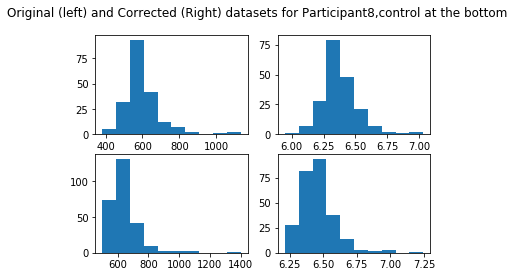

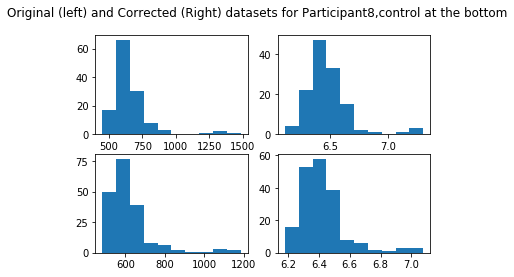

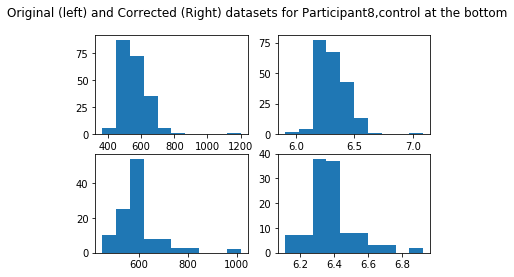

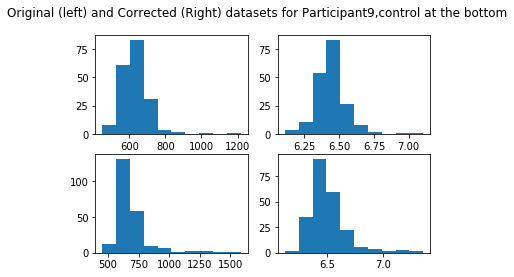

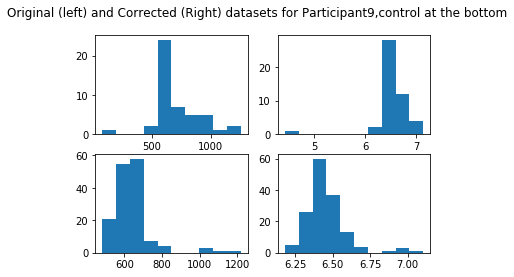

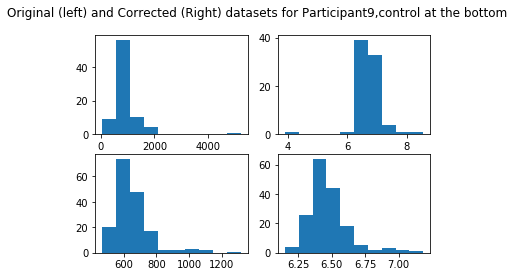

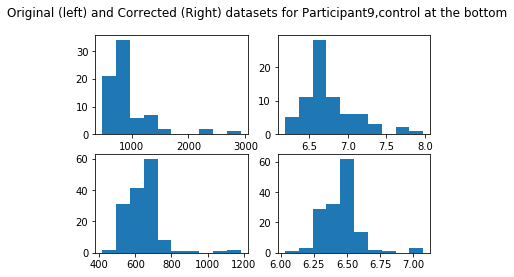

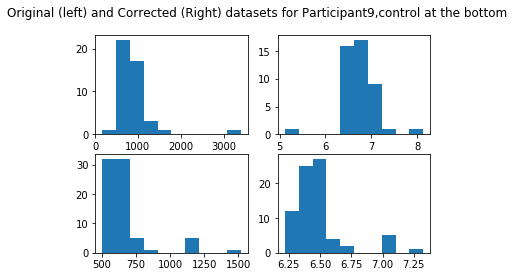

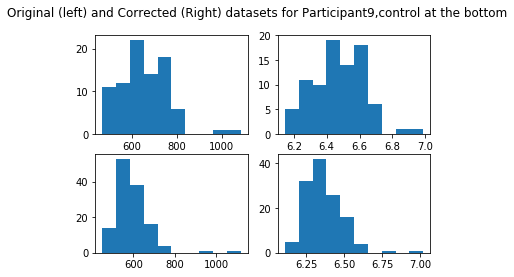

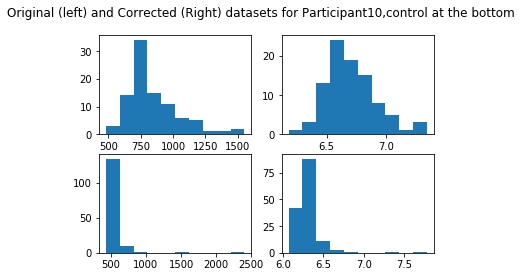

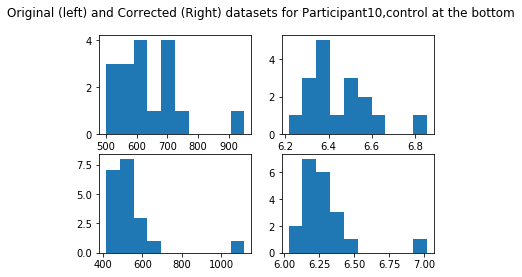

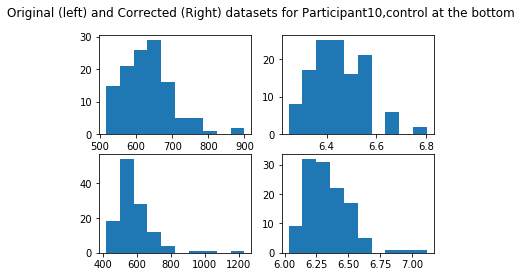

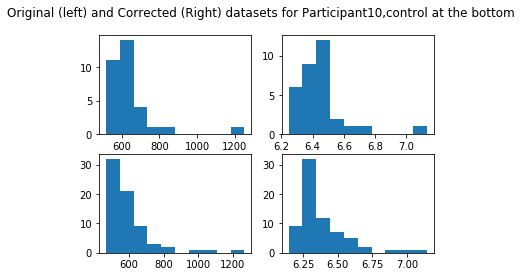

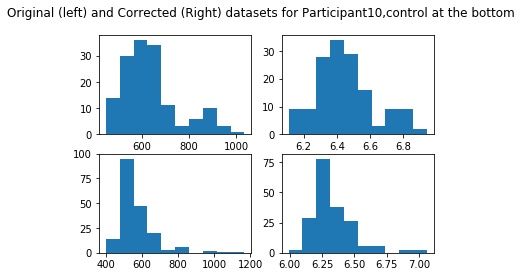

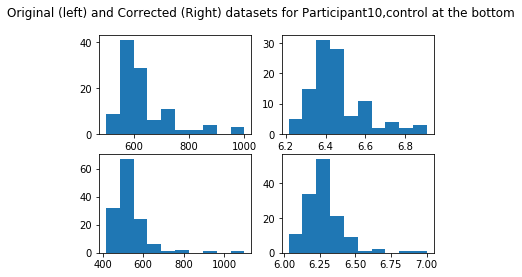

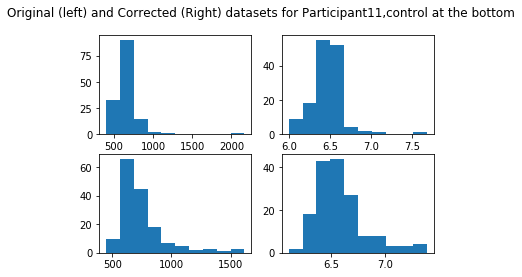

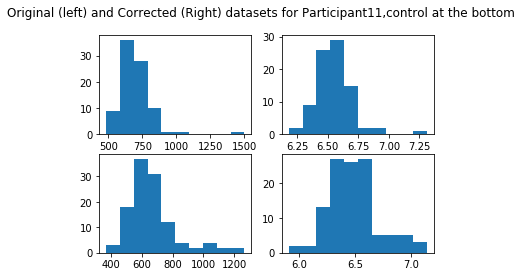

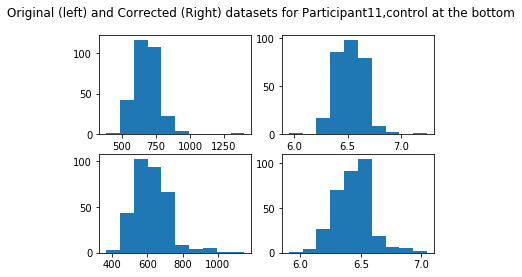

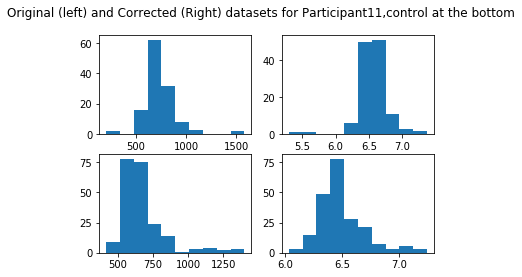

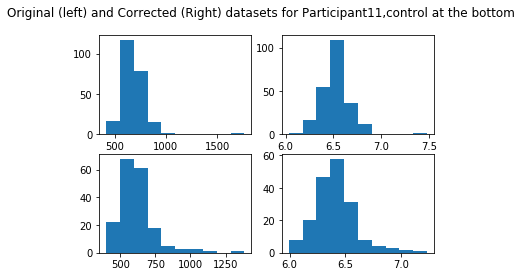

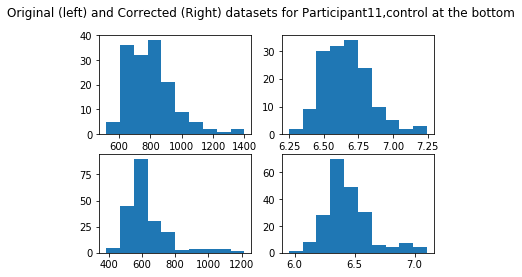

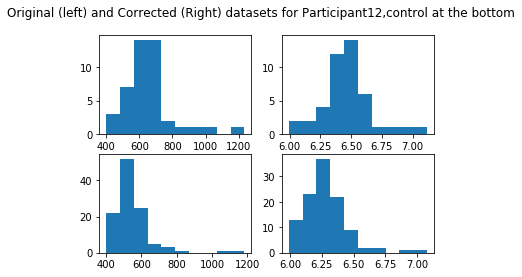

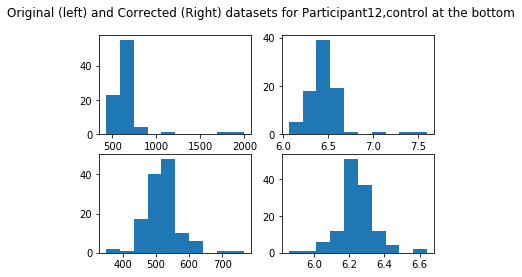

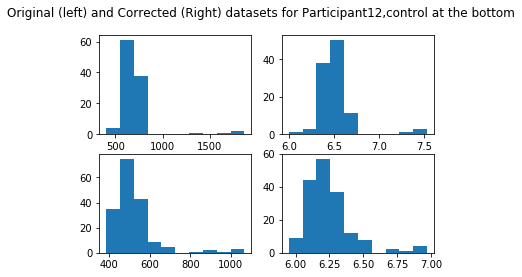

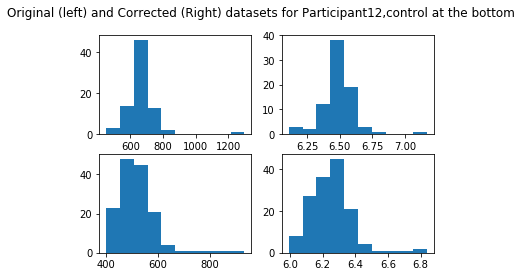

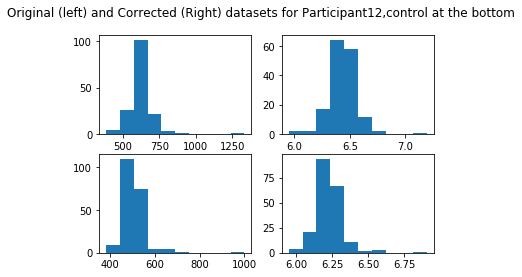

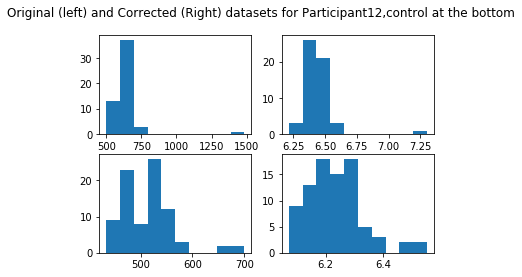

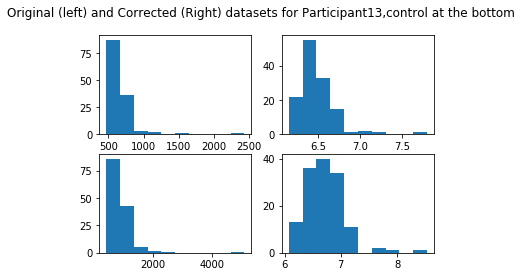

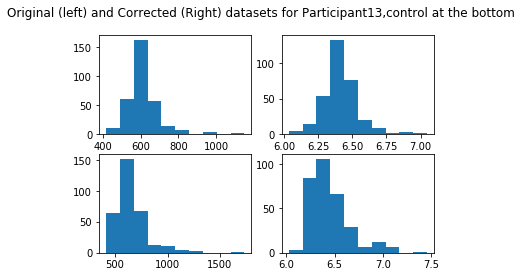

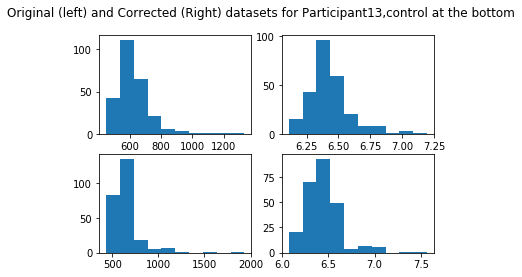

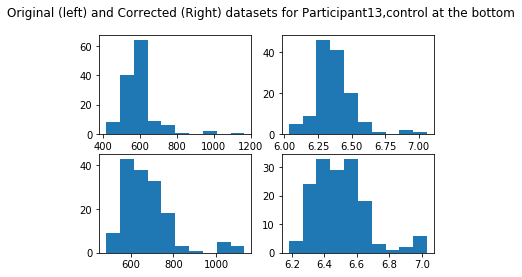

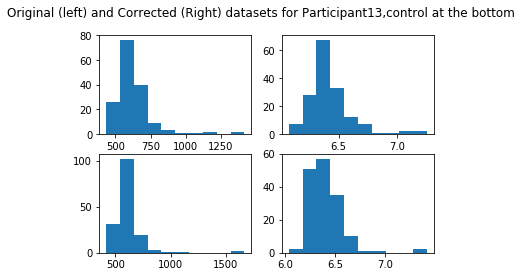

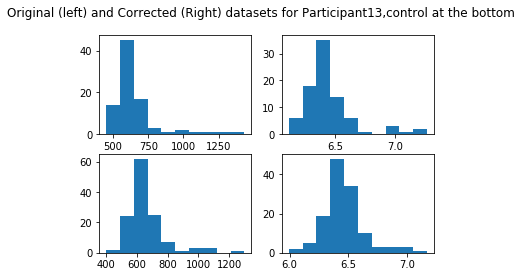

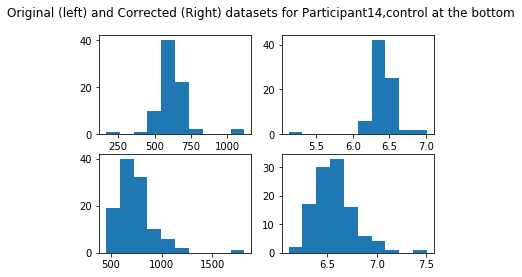

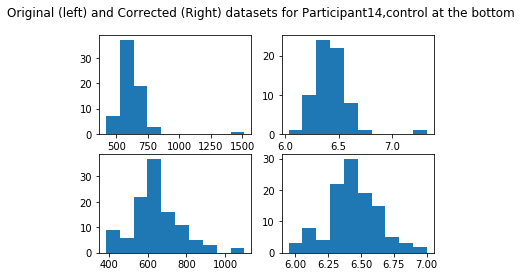

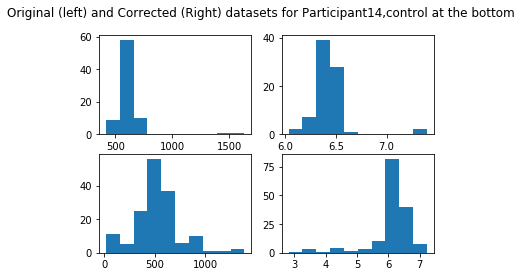

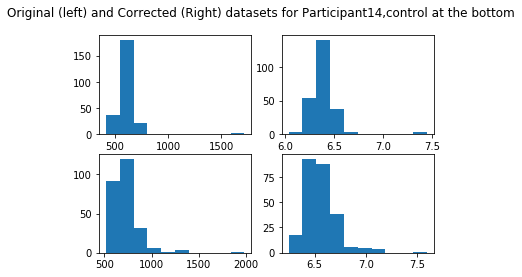

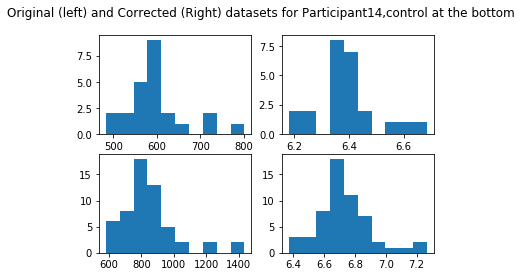

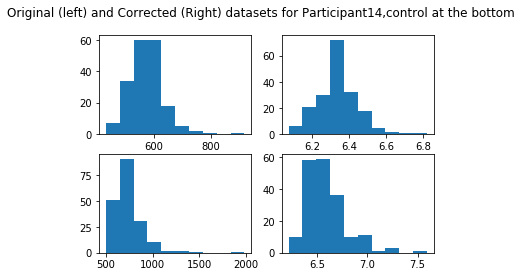

In [11]:
betavalues = []

Logbetavalues = []

expsubjects = [i for i in subject_list if i <= 30]

contbad = []

expbad = []


for i in expsubjects:

  c = i + 30

  all_sessionscont = EEGframe[EEGframe.subject == c]  #pull matched control participant

  all_sessionsexp = EEGframe[EEGframe.subject == i]  #pull experimental participant

  for s in range(1, 7):

    cleaned_sessionexp = all_sessionsexp[all_sessionsexp.session == s]

    cleaned_sessioncont = all_sessionscont[all_sessionscont.session == s]

    
    
    
    
    #reset index

    cleaned_sessionexp.reset_index(drop=True, inplace = True)
    cleaned_sessioncont.reset_index(drop=True, inplace = True)
    
    #CLean up experiment df
    
    Cleanedexp = cleaned_sessionexp
        
    before = len(Cleanedexp)
    
    indexNames = cleaned_sessionexp[(cleaned_sessionexp['Reaction Time (ms)-Z'] > 3) | (cleaned_sessionexp['Reaction Time (ms)-Z'] < -3)].index

    Cleanedexp.drop(indexNames, inplace=True)

    #Cleaned.reset_index()

    indexNamesA = Cleanedexp[(Cleanedexp['Total Stream Data (EEG-1)-Z'] > 3) | (Cleanedexp['Total Stream Data (EEG-1)-Z'] < -3)].index

    Cleanedexp.drop(indexNamesA, inplace=True)

    indexNamesB = Cleanedexp[(Cleanedexp['Total Stream Data (EEG-2)-Z'] > 3) | (Cleanedexp['Total Stream Data (EEG-2)-Z'] < -3)].index

    Cleanedexp.drop(indexNamesB, inplace=True)

    indexNamesC = Cleanedexp[(Cleanedexp['Total Stream Data (EEG-3)-Z'] > 3) | (Cleanedexp['Total Stream Data (EEG-3)-Z'] < -3)].index

    Cleanedexp.drop(indexNamesC, inplace=True)

    indexNamesD = Cleanedexp[(Cleanedexp['Total Stream Data (EEG-4)-Z'] > 3) | (Cleanedexp['Total Stream Data (EEG-4)-Z'] < -3)].index

    Cleanedexp.drop(indexNamesD, inplace=True)

    indexNamesE = Cleanedexp[(Cleanedexp['Total Stream Data (Alpha Score)-Z'] > 3) | (Cleanedexp['Total Stream Data (Alpha Score)-Z'] < -3)].index

    Cleanedexp.drop(indexNamesE, inplace=True)

    after = len(Cleanedexp)
    
    left = (after/before)*100
    print(after)
    
    print('the percentage left of results for participant',i,'session',s,'is',left)
    
    
    if left < 70:
        
        expbad.append(tuple((i, s)))

    
    #CLean up control df
    
    Cleanedcont = cleaned_sessioncont
        
    before = len(Cleanedcont)
    
    indexNamesc = cleaned_sessioncont[(cleaned_sessioncont['Reaction Time (ms)-Z'] > 3) | (cleaned_sessioncont['Reaction Time (ms)-Z'] < -3)].index

    Cleanedcont.drop(indexNamesc, inplace=True)

    #Cleaned.reset_index()

    indexNamesAc = Cleanedcont[(Cleanedcont['Total Stream Data (EEG-1)-Z'] > 3) | (Cleanedcont['Total Stream Data (EEG-1)-Z'] < -3)].index

    Cleanedcont.drop(indexNamesAc, inplace=True)

    indexNamesBc = Cleanedcont[(Cleanedexp['Total Stream Data (EEG-2)-Z'] > 3) | (Cleanedcont['Total Stream Data (EEG-2)-Z'] < -3)].index

    Cleanedcont.drop(indexNamesBc, inplace=True)

    indexNamesCc = Cleanedcont[(Cleanedexp['Total Stream Data (EEG-3)-Z'] > 3) | (Cleanedcont['Total Stream Data (EEG-3)-Z'] < -3)].index

    Cleanedcont.drop(indexNamesCc, inplace=True)

    indexNamesDc = Cleanedcont[(Cleanedexp['Total Stream Data (EEG-4)-Z'] > 3) | (Cleanedcont['Total Stream Data (EEG-4)-Z'] < -3)].index

    Cleanedcont.drop(indexNamesDc, inplace=True)

    indexNamesEc = Cleanedcont[(Cleanedexp['Total Stream Data (Alpha Score)-Z'] > 3) | (Cleanedcont['Total Stream Data (Alpha Score)-Z'] < -3)].index

    Cleanedcont.drop(indexNamesEc, inplace=True)
    
    after = len(Cleanedcont)
    
    leftc = (after/before)*100
    
    print(after)
    
    print('the percentage left of results for control participant',c,'session',s,'is',leftc)
    
    if leftc < 70:
        
        contbad.append(tuple((c, s))) 
        
    cleaned_sessionexp.reset_index(inplace=True, drop = True)

    cleaned_sessioncont.reset_index(inplace=True, drop = True)

    #index numbers wherever there is an answer

    Correctsexp = cleaned_sessionexp[cleaned_sessionexp['Accuracy'] >= 0].index.tolist()

    Correctsdfexp = cleaned_sessionexp[cleaned_sessionexp['Accuracy'] >= 0]

    Correctscont = cleaned_sessioncont[cleaned_sessioncont['Accuracy'] >= 0].index.tolist()

    Correctsdfcont = cleaned_sessioncont[cleaned_sessioncont['Accuracy'] >= 0]

    
    #loop to build array from rows +30 and -30 

    mean_colexp = []

    for x in Correctsexp:

      slicedexp = cleaned_sessionexp.iloc[x-60:x+1]

      adv_alphaexp = slicedexp['Total Stream Data (Alpha Score)'].mean()

      #build a list

      mean_colexp.append(adv_alphaexp) 

    mean_colcont = []

    for x in Correctscont:

      slicedcont = cleaned_sessioncont.iloc[x-60:x+1]

      adv_alphacont = slicedcont['Total Stream Data (Alpha Score)'].mean()

      #build a list

      mean_colcont.append(adv_alphacont) 


     #add column containing averaged alphavalues to dataframe 

    Correctsdfexp.loc[:,'averaged_alpha'] = mean_colexp

    Correctsdfcont.loc[:,'averaged_alpha'] = mean_colcont

     #add condition column

    Correctsdfexp['Condition'] = 1

    Correctsdfcont['Condition'] = 0
    
    #histograms of reaction times for both participants pre and post normalising
    
    fig, axs = plt.subplots(2, 2)

    Correctsdfexp['RT_transformed'] = np.log(Correctsdfexp['Reaction Time (ms)'])
    
    Correctsdfcont['RT_transformed'] = np.log(Correctsdfcont['Reaction Time (ms)'])
    
    axs[0,0].hist(Correctsdfexp['Reaction Time (ms)'])
    
    axs[0,1].hist(Correctsdfexp['RT_transformed'])
    
    axs[1,0].hist(Correctsdfcont['Reaction Time (ms)'])
    
    axs[1,1].hist(Correctsdfcont['RT_transformed'])
    
    plt.suptitle('Original (left) and Corrected (Right) datasets for Participant'+ str(i) +',control at the bottom')
    
    fileexp = "%s.png" % i
    
    plt.savefig(fileexp)
    
    #Merge both datafranes

    analysis_dataframe = pd.concat([Correctsdfexp, Correctsdfcont], ignore_index=True, sort=False)

    analysis_dataframe.reset_index(drop=True, inplace = True)
    
    # set up interaction columns

    analysis_dataframe['ConditionAcc'] = analysis_dataframe.Condition * analysis_dataframe.Accuracy

    analysis_dataframe['ConditionAlpha'] = analysis_dataframe.Condition * analysis_dataframe.averaged_alpha

    analysis_dataframe['AccAlpha'] = analysis_dataframe.Accuracy * analysis_dataframe.averaged_alpha

    analysis_dataframe['ConditionAccAlpha'] = analysis_dataframe.Condition * analysis_dataframe.Accuracy * analysis_dataframe.averaged_alpha

    # carry out linear regression () with scikit learn

    # Break out X & y for linear regression

    y = analysis_dataframe[['RT_transformed']]

    X = analysis_dataframe[['averaged_alpha','Condition','Accuracy','ConditionAcc','ConditionAlpha','AccAlpha', 'ConditionAccAlpha']]

    # Break out X & y for logistic regression

    yL = analysis_dataframe[['Accuracy']]

    XL = analysis_dataframe[['averaged_alpha','Total Stream Data (Alpha Score)','Condition','ConditionAcc','ConditionAlpha']]

    #Linear regression and write beta values
    
    
    Regression_Model = LinearRegression()

    Regression_Model.fit(X,y)

    betavaluessingle = pd.DataFrame(Regression_Model.coef_, columns = ['averaged_alpha','Condition','Accuracy','ConditionAcc','ConditionAlpha','AccAlpha','ConditionAccAlpha'])
 
    betavaluessingle['Participant'] = i
    betavaluessingle['Control'] = c
    betavaluessingle['Session']  = s

    betavalues.append(betavaluessingle)

    #Logistic regression and write beta values
    
    if yL['Accuracy'].mean() == 1:
        
        print('no incorrect answers, cannot analyse')
        
    else:
        
        LogRegression_Model = LogisticRegression()

        LogRegression_Model.fit(XL,yL)

        Logbetavaluessingle = pd.DataFrame(LogRegression_Model.coef_, columns = ['averaged_alpha','Total Stream Data (Alpha Score)','Condition','ConditionAcc','ConditionAlpha'])

        Logbetavaluessingle['Participant'] = i
        Logbetavaluessingle['Control'] = c
        Logbetavaluessingle['Session']  = s
        
        Logbetavalues.append(Logbetavaluessingle)


#remove poor quality sessions 
        

        
            
#Concantenate all linear regression and write to CSV

Betaframe = pd.concat(betavalues, axis=0, ignore_index=True)

LogBetaframe = pd.concat(Logbetavalues, axis=0, ignore_index=True)


for i in range(len(expbad)):
    
    part = expbad[i][0] 
    sess = expbad[i][1] 

    Betaframe.drop(Betaframe[(Betaframe['Participant'] == part) & (Betaframe['Session'] == sess)].index,inplace=True) 
    LogBetaframe.drop(LogBetaframe[(LogBetaframe['Participant'] == part) & (LogBetaframe['Session'] == sess)].index,inplace=True)
    
for i in range(len(contbad)):
    
    part = contbad[i][0] 
    sess = contbad[i][1] 

    Betaframe.drop(Betaframe[(Betaframe['Participant'] == part) & (Betaframe['Session'] == sess)].index,inplace=True)
    LogBetaframe.drop(LogBetaframe[(LogBetaframe['Participant'] == part) & (LogBetaframe['Session'] == sess)].index,inplace=True)

#Laptop
      
Betaframe.to_csv(r'C:\Users\charl\Dropbox\Python\betavalues.csv')

#PC

#Betaframe.to_csv(r'C:\Users\Nick Rendell\Dropbox\Python\Testbed\betavalues.csv')

#PC

#LogBetaframe.to_csv(r'C:\Users\Nick Rendell\Dropbox\Python\Testbed\Logbetavalues.csv')

#Laptop
      
LogBetaframe.to_csv(r'C:\Users\charl\Dropbox\Python\Logbetavalues.csv')


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2., 49., 10.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  1.]),
 array([-19.42639216, -18.09258269, -16.75877321, -15.42496373,
        -14.09115425, -12.75734477, -11.4235353 , -10.08972582,
         -8.75591634,  -7.42210686,  -6.08829739,  -4.75448791,
         -3.42067843,  -2.08686895,  -0.75305948,   0.58075   ,
          1.91455948,   3.24836896,   4.58217843,   5.91598791,
          7.24979739,   8.58360687,   9.91741634,  11.25122582,
         12.5850353 ,  13.91884478,  15.25265425,  16.58646373,
         17.92027321,  19.25408269,  20.58789217]),
 <a list of 30 Patch objects>)

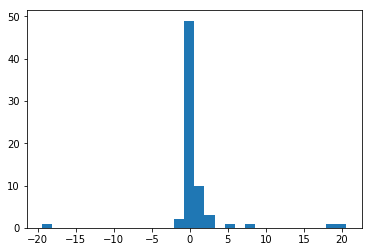

In [15]:
plt.hist(Betaframe['Condition'],bins=30)

In [28]:
expbad[1][0]

8

In [ ]:
plt.hist(LogBetaframe['Total Stream Data (Alpha Score)'],bins = 20)

In [11]:
Betaframe.drop(Betaframe[(Betaframe['Participant'] == x[0]) & (Betaframe['Session'] == x[1])].index)

,Sample Timestamp,Total Stream Data (EEG-1),Total Stream Data (EEG-2),Total Stream Data (EEG-3),Total Stream Data (EEG-4),Total Stream Data (Alpha Score),subject,session,block,Session Baseline Score (Alpha),...,Total Stream Data (EEG-3)-Z,Total Stream Data (EEG-4)-Z,Total Stream Data (Alpha Score)-Z,averaged_alpha,Condition,RT_transformed,ConditionAcc,ConditionAlpha,AccAlpha,ConditionAccAlpha
0,2.967089,854.6154,827.6190,838.4982,865.8975,0.351850,14,6,1,0.297134,...,0.098797,0.338848,-0.085607,0.388314,1,6.477226,1.0,0.388314,0.388314,0.388314
1,23.368420,863.0769,834.8718,847.3626,869.9268,0.596721,14,6,1,0.297134,...,0.156332,0.406719,1.361964,0.594265,1,6.477052,1.0,0.594265,0.594265,0.594265
2,26.401960,852.6007,840.5128,851.7949,850.5861,0.459470,14,6,1,0.297134,...,0.185100,0.080935,0.550596,0.460172,1,6.424402,1.0,0.460172,0.460172,0.460172
3,29.002180,834.8718,834.0659,846.1539,839.7070,0.350585,14,6,1,0.297134,...,0.148487,-0.102317,-0.093081,0.368974,1,6.397086,1.0,0.368974,0.368974,0.368974
4,42.486490,848.5714,834.0659,845.7509,860.2564,0.329705,14,6,1,0.297134,...,0.145871,0.243826,-0.216515,0.498922,1,6.365709,1.0,0.498922,0.498922,0.498922
5,52.670390,879.5970,842.5275,842.5275,873.9561,0.501513,14,6,1,0.297134,...,0.124949,0.474590,0.799137,0.551082,1,6.396863,1.0,0.551082,0.551082,0.551082
6,57.937750,866.7033,838.0952,842.1245,844.9451,0.404193,14,6,1,0.297134,...,0.122334,-0.014084,0.223824,0.394475,1,6.397288,1.0,0.394475,0.394475,0.394475
7,61.538070,865.0916,832.4542,837.6923,852.6007,0.369500,14,6,1,0.297134,...,0.093566,0.114870,0.018731,0.334463,1,6.392451,1.0,0.334463,0.334463,0.334463
8,74.255520,852.1978,832.4542,841.7216,873.5531,0.419564,14,6,1,0.297134,...,0.119719,0.467802,0.314692,0.452750,1,6.424676,1.0,0.452750,0.452750,0.452750
9,77.072320,858.2418,835.6777,846.5568,864.6887,0.487076,14,6,1,0.297134,...,0.151102,0.318486,0.713792,0.446761,1,6.247563,1.0,0.446761,0.446761,0.446761


In [13]:
    for x in expbad:
        
       analysis_dataframe.drop(analysis_dataframe[(analysis_dataframe['subject'] = x[0]) & (analysis_dataframe['session'] = x[1])].index)
    

SyntaxError: invalid syntax (<ipython-input-13-1349be0ba4c1>, line 3)

In [9]:
for i in range(len(expbad)):
    
    part = expbad[i][0] 
    sess = expbad[i][1] 

    Betaframe.drop(Betaframe[(Betaframe['Participant'] == part) & (Betaframe['Session'] == sess)].index,inplace=True)

In [3]:
expbad

[(6, 1), (8, 3), (10, 2)]

In [10]:
Betaframe

,averaged_alpha,Condition,Accuracy,ConditionAcc,ConditionAlpha,AccAlpha,ConditionAccAlpha,Participant,Control,Session
0,0.436363,-7.312765e-01,-2.277076e-01,0.722984,0.461725,-0.008198,-0.987831,2,32,1
1,-0.085659,-2.368359e-01,2.562740e-01,0.019438,0.013204,-0.027702,0.071161,2,32,2
2,0.672568,-6.986878e-01,5.937714e-01,0.503333,1.348994,-0.676496,-1.271808,2,32,3
3,0.183120,2.175825e-02,2.116061e-01,-0.215144,-0.586231,-0.185420,0.529253,2,32,4
4,-1.017458,1.483931e+00,4.394600e-02,-1.620736,-0.817821,1.125189,0.843272,2,32,5
5,0.353821,7.050174e-02,3.248572e-01,-0.358675,-0.610671,-0.341083,0.724107,2,32,6
6,-0.660266,5.060503e-01,-2.889966e-02,-0.403735,-0.791774,0.852451,0.406646,3,33,1
7,0.655704,3.552291e-01,4.606150e-01,-0.260043,-0.878829,-0.763733,1.022196,3,33,2
8,-0.307583,9.216585e-02,1.270393e-01,0.080766,0.026935,0.321673,-0.084079,3,33,3
9,-0.494650,8.850711e-02,2.396464e-01,-0.179020,0.011335,0.406778,0.095889,3,33,4
